# IPLM Prediction
Indeks Pembangunan Literasi Masyarakat dikerjakan dengan dataset IPLM yang dapat didownload pada link [berikut](https://drive.google.com/file/d/1F6cHCox-BMrd1BOyAIkK83qusgWo4A2X/view?usp=share_link). 
Lakukan prediksi apakah IPLM tinggi atau rendah (kolom **survived**), bernilai 0 jika rendah, dan 1 jika tinggi.

## Identitas Kelompok:
1. Alvin Wilta (13519163)
2. Leonard Matheus(13519215)
3. Hughie Alghaniyyu Emiliano (13519217)

# 0. Loading Data and Library

In [1]:
# Put your library here
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from pandas.plotting import scatter_matrix

import re
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.svm import SVC
from pickle import dump

In [2]:
# Read data here
url='https://drive.google.com/file/d/1F6cHCox-BMrd1BOyAIkK83qusgWo4A2X/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
kategori = ['Provinsi','Latitude','Longtitude','Pemerataan Layanan Perpustakaan', \
            'Ketercukupan Koleksi Perpustakaan','Ketercukupan Tenaga Perpustakaan', \
            'Tingkat Kunjungan Masyarakat per hari','Perpustakaan Ber-SNP', \
            'Keterlibatan Masyarakat dalam KIE','Anggota Perpustakaan','Nilai Indeks']
df

,Provinsi,Latitude,Longtitude,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan,Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan Ber-SNP,Keterlibatan Masyarakat dalam KIE,Anggota Perpustakaan,Nilai Indeks
0,PROVINSI ACEH,4,97,0.00102,0.10789,0.00012,0.00013,0.00047,0.00750,0.03407,15.12
1,PROVINSI SUMATERA UTARA,2,99,0.00072,0.05713,0.00007,0.00010,0.00004,0.00268,0.01867,7.94
2,PROVINSI SUMATERA BARAT,-1,100,0.00078,0.08044,0.00010,0.00243,0.00069,0.00794,0.04931,14.17
3,PROVINSI RIAU,1,102,0.00061,0.13829,0.00007,0.00043,0.00006,0.00842,0.05880,20.67
4,PROVINSI JAMBI,-2,103,0.00109,0.10125,0.00010,0.00121,0.00005,0.00618,0.03048,14.03
5,PROVINSI SUMATERA SELATAN,-3,104,0.00065,0.13035,0.00009,0.00043,0.00019,0.00577,0.00823,14.57
6,PROVINSI BENGKULU,-4,102,0.00096,0.12710,0.00007,0.00021,0.00021,0.00471,0.02534,15.86
7,PROVINSI LAMPUNG,-5,105,0.00062,0.09320,0.00003,0.00009,0.00006,0.00374,0.00951,10.72
8,PROVINSI BANGKA BELITUNG,-2,107,0.00079,0.11404,0.00025,0.00008,0.00060,0.03880,0.03114,18.57
9,PROVINSI KEPULAUAN RIAU,4,108,0.00067,0.15949,0.00020,0.00045,0.00017,0.01311,0.03917,21.33


# I. Data Understanding
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal ini meliputi:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (outlier)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instances dan features)
2. Tipe dari tiap-tiap fitur 
3. Banyaknya unique values dari fitur yang bertipe kategorikal
4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal

### 1. Ukuran dari data (instances dan features)

In [3]:
df.count()

Provinsi                                 34
Latitude                                 34
Longtitude                               34
Pemerataan Layanan Perpustakaan          34
Ketercukupan Koleksi Perpustakaan        34
Ketercukupan Tenaga Perpustakaan         34
Tingkat Kunjungan Masyarakat per hari    34
Perpustakaan Ber-SNP                     34
Keterlibatan Masyarakat dalam KIE        34
Anggota Perpustakaan                     34
Nilai Indeks                             34
dtype: int64

### 2. Tipe dari tiap-tiap fitur

In [4]:
df.dtypes

Provinsi                                  object
Latitude                                   int64
Longtitude                                 int64
Pemerataan Layanan Perpustakaan          float64
Ketercukupan Koleksi Perpustakaan        float64
Ketercukupan Tenaga Perpustakaan         float64
Tingkat Kunjungan Masyarakat per hari    float64
Perpustakaan Ber-SNP                     float64
Keterlibatan Masyarakat dalam KIE        float64
Anggota Perpustakaan                     float64
Nilai Indeks                             float64
dtype: object

### 3. Banyaknya unique values dari fitur yang bertipe kategorikal

In [5]:
df_unique = df[['Provinsi']].nunique().to_frame().reset_index()
df_unique.columns = ['Fitur','Banyak_Unique_Values']
df_unique

,Fitur,Banyak_Unique_Values
0,Provinsi,34


### 4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal

In [6]:
df[['Latitude', 'Longtitude','Pemerataan Layanan Perpustakaan', \
    'Ketercukupan Koleksi Perpustakaan', 'Ketercukupan Tenaga Perpustakaan', \
    'Tingkat Kunjungan Masyarakat per hari', 'Perpustakaan Ber-SNP', \
    'Keterlibatan Masyarakat dalam KIE','Anggota Perpustakaan','Nilai Indeks']].describe()

,Latitude,Longtitude,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan,Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan Ber-SNP,Keterlibatan Masyarakat dalam KIE,Anggota Perpustakaan,Nilai Indeks
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,-2.794118,113.705882,0.000864,0.112466,0.000092,0.000585,0.000183,0.011511,0.036903,16.259412
std,3.707318,10.241122,0.000268,0.052069,0.000056,0.001442,0.000196,0.013818,0.052923,9.213229
min,-9.000000,97.000000,0.000390,0.047820,0.000010,0.000040,0.000010,0.001500,0.004090,5.870000
25%,-5.750000,106.250000,0.000663,0.085245,0.000053,0.000100,0.000060,0.003807,0.011415,11.447500
50%,-2.500000,113.000000,0.000840,0.105475,0.000080,0.000170,0.000080,0.006600,0.024140,14.220000
75%,0.000000,120.750000,0.001085,0.125225,0.000127,0.000445,0.000285,0.012538,0.041127,17.720000
max,4.000000,139.000000,0.001480,0.325940,0.000250,0.008330,0.000690,0.069310,0.310530,58.130000


## I.2
Carilah:
1. Missing values dari tiap fitur
2. Outliers dari tiap fitur (gunakan metode yang kalian ketahui)

### 1. Missing values dari tiap fitur

In [7]:
#Hitung masing-masing missing value fitur
total = df.isnull().sum().sort_values(ascending=False)
#Dapatkan persentase missing value
percent_1 = df.isnull().sum()/df.isnull().count()*100
#Sort hasil perhitungan missing value
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Provinsi,0,0.0
Latitude,0,0.0
Longtitude,0,0.0
Pemerataan Layanan Perpustakaan,0,0.0
Ketercukupan Koleksi Perpustakaan,0,0.0
Ketercukupan Tenaga Perpustakaan,0,0.0
Tingkat Kunjungan Masyarakat per hari,0,0.0
Perpustakaan Ber-SNP,0,0.0
Keterlibatan Masyarakat dalam KIE,0,0.0
Anggota Perpustakaan,0,0.0


### 2. Outliers dari tiap fitur (gunakan metode yang kalian ketahui)

#### Latitude

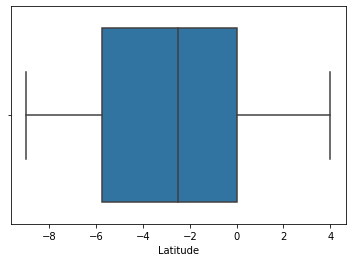

In [8]:
sns.boxplot(df['Latitude'])

#### Longitude

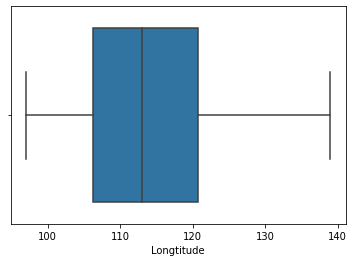

In [9]:
sns.boxplot(df['Longtitude'])

#### Pemerataan Layanan Perpustakaan

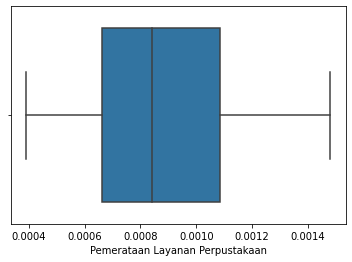

In [10]:
sns.boxplot(df['Pemerataan Layanan Perpustakaan'])

#### Ketercukupan Koleksi Perpustakaan

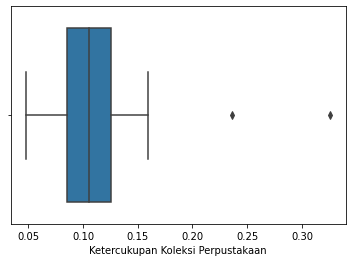

In [11]:
sns.boxplot(df['Ketercukupan Koleksi Perpustakaan'])

#### Ketercukupan Tenaga Perpustakaan

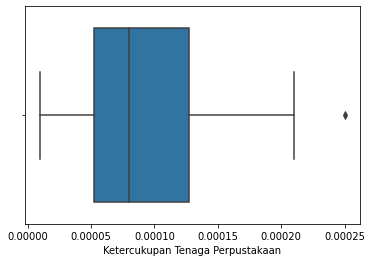

In [12]:
sns.boxplot(df['Ketercukupan Tenaga Perpustakaan'])

#### Tingkat Kunjungan Masyarakat per hari

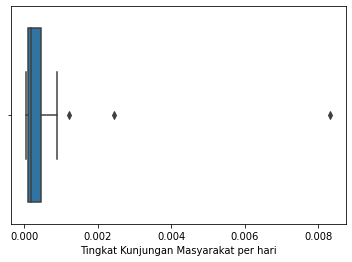

In [13]:
sns.boxplot(df['Tingkat Kunjungan Masyarakat per hari'])

#### Perpustakaan Ber-SNP

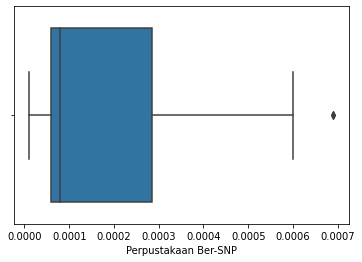

In [14]:
sns.boxplot(df['Perpustakaan Ber-SNP'])

#### Keterlibatan Masyarakat dalam KIE

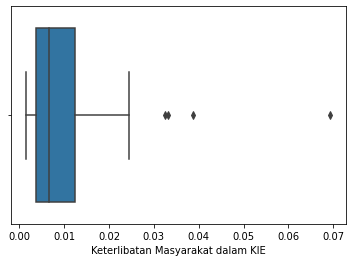

In [15]:
sns.boxplot(df['Keterlibatan Masyarakat dalam KIE'])

#### Anggota Perpustakaan

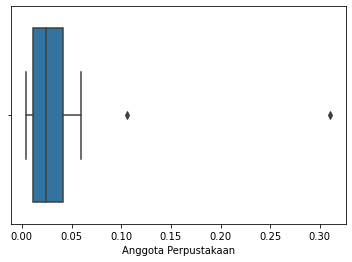

In [16]:
sns.boxplot(df['Anggota Perpustakaan'])

#### Nilai Indeks

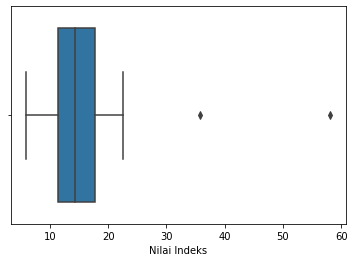

In [17]:
sns.boxplot(df['Nilai Indeks'])

## I.3
Carilah:
1. Korelasi antar fitur
2. Visualisasikan distribusi dari tiap fitur (kategorikal dan kontinu)
3. Visualisasikan distribusi dari tiap fitur, dengan data dibagi tiap unique values fitur survived

### 1. Korelasi antar fitur

#### Korelasi semua fitur

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9040a4790>,
      dtype=object)

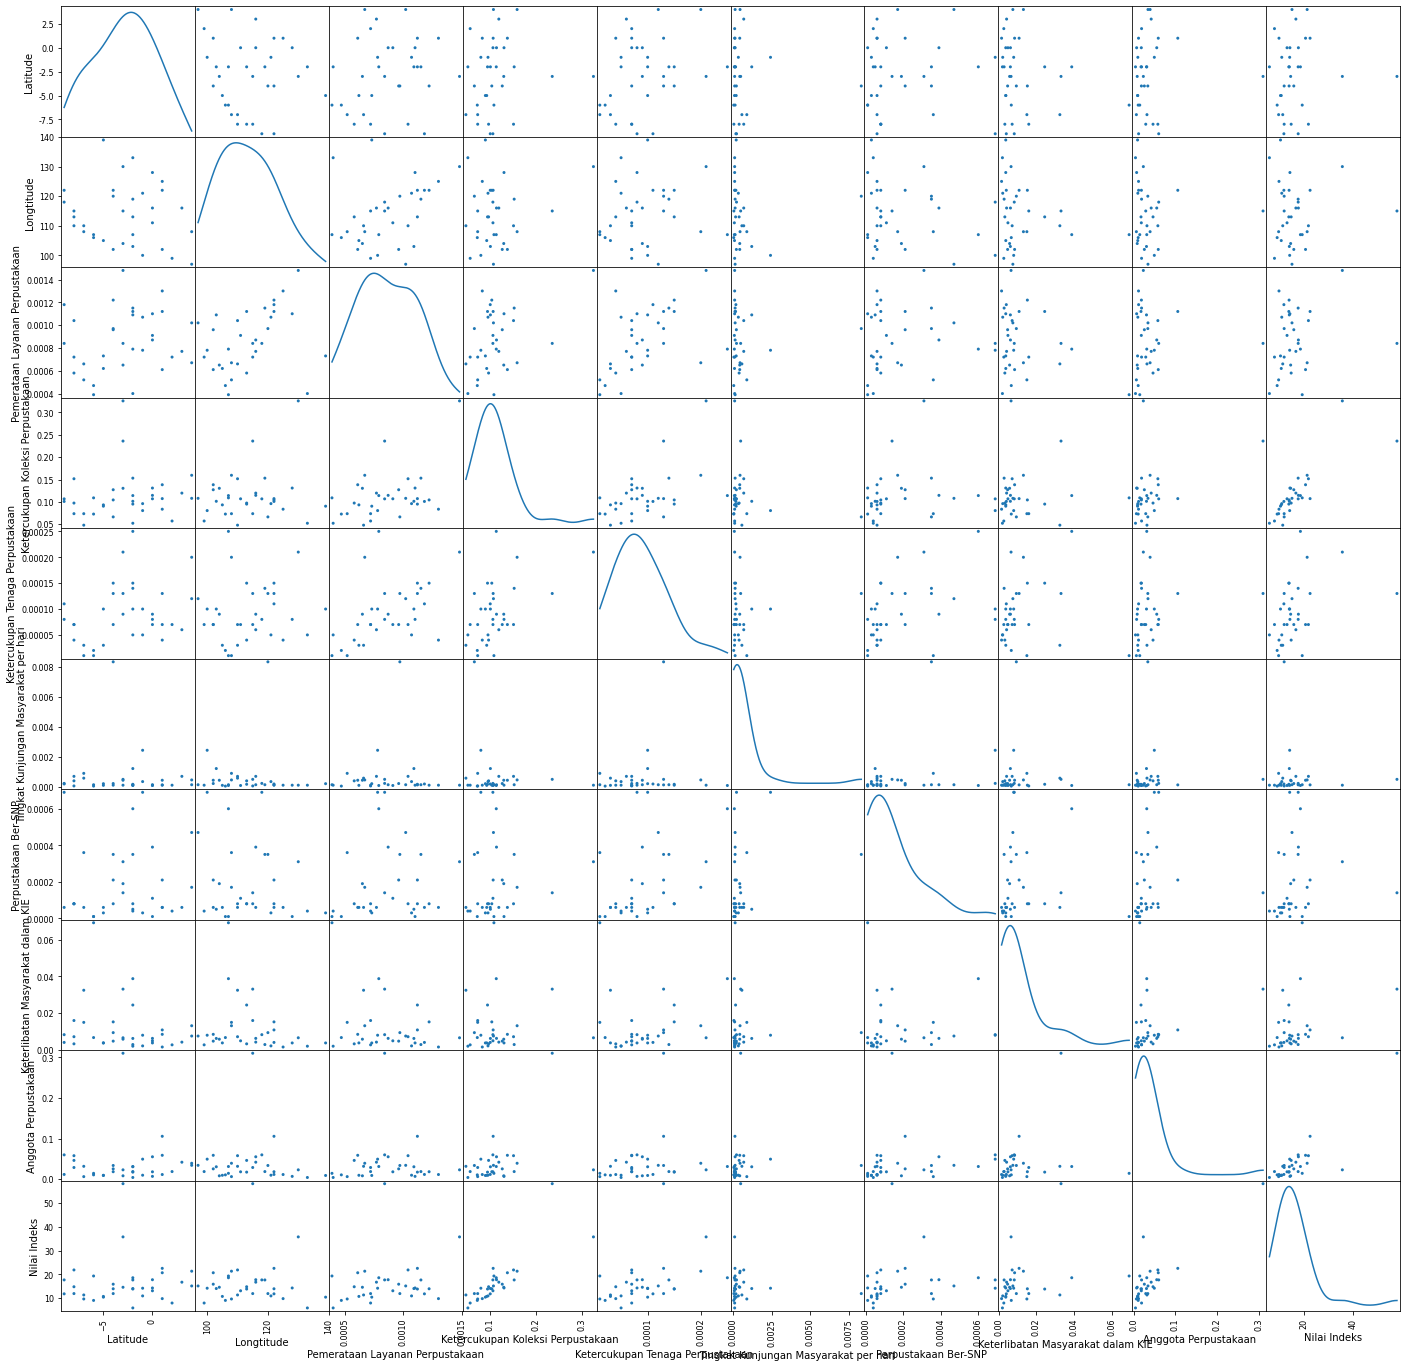

In [18]:
scatter_matrix(df[['Latitude', 'Longtitude','Pemerataan Layanan Perpustakaan', \
    'Ketercukupan Koleksi Perpustakaan', 'Ketercukupan Tenaga Perpustakaan', \
    'Tingkat Kunjungan Masyarakat per hari', 'Perpustakaan Ber-SNP', \
    'Keterlibatan Masyarakat dalam KIE','Anggota Perpustakaan','Nilai Indeks']], alpha=1, figsize=(24, 24), diagonal='kde')

### 2. Visualisasikan distribusi dari tiap fitur (kategorikal dan kontinu)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff901ed3410>,
      dtype=object)

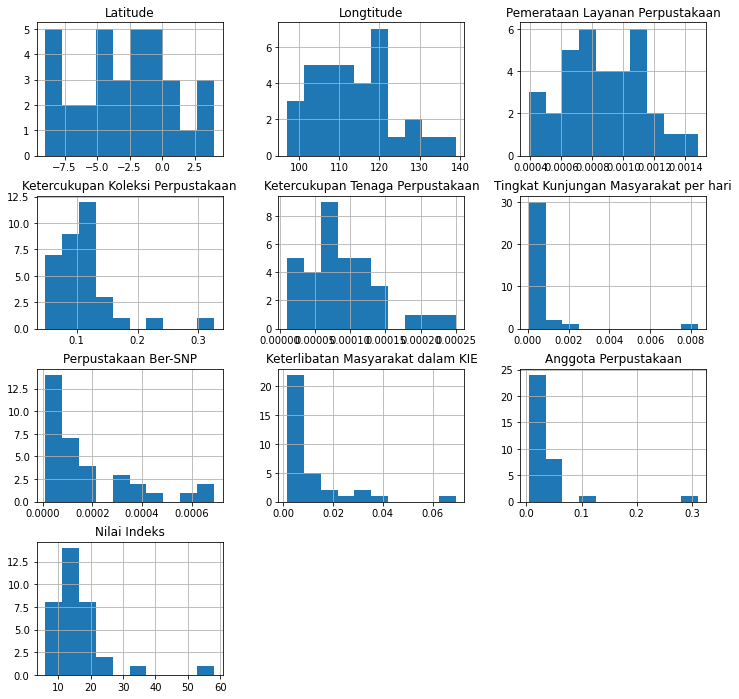

In [19]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df[['Latitude', 'Longtitude','Pemerataan Layanan Perpustakaan', \
    'Ketercukupan Koleksi Perpustakaan', 'Ketercukupan Tenaga Perpustakaan', \
    'Tingkat Kunjungan Masyarakat per hari', 'Perpustakaan Ber-SNP', \
    'Keterlibatan Masyarakat dalam KIE','Anggota Perpustakaan','Nilai Indeks']].hist(ax = ax)

## I.4
Lakukanlah analisa pada data lebih lanjut jika dibutuhkan, kemudian lakukanlah:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan missing values
4. Transformasi data kategorikal menjadi numerikal (encoding), dengan metode yang kalian inginkan
5. Lakukan scaling dengan MinMaxScaler

### 2. Pembuangan fitur yang menurut kalian tidak dibutuhkan

- Data Latitude dibuang karena data uniquenya sangat banyak
- Data Longtitude dibuang karena data uniquenya sangat banyak
- Data Provjnsi dibuang karena data uniquenya sangat banyak

In [20]:
df = df.drop(['Latitude'], axis=1)
df = df.drop(['Longtitude'], axis=1)
df = df.drop(['Provinsi'], axis=1)

### 4. Transformasi data kategorikal menjadi numerikal (encoding), dengan metode yang kalian inginkan

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Pemerataan Layanan Perpustakaan        34 non-null     float64
 1   Ketercukupan Koleksi Perpustakaan      34 non-null     float64
 2   Ketercukupan Tenaga Perpustakaan       34 non-null     float64
 3   Tingkat Kunjungan Masyarakat per hari  34 non-null     float64
 4   Perpustakaan Ber-SNP                   34 non-null     float64
 5   Keterlibatan Masyarakat dalam KIE      34 non-null     float64
 6   Anggota Perpustakaan                   34 non-null     float64
 7   Nilai Indeks                           34 non-null     float64
dtypes: float64(8)
memory usage: 2.2 KB


#### Nilai indeks diubah menjadi Kategori indeks

In [22]:
df['Nilai Indeks'] = df['Nilai Indeks'].astype(int)
df.loc[ df['Nilai Indeks'] <= 15, 'Nilai Indeks'] = 0
df.loc[ df['Nilai Indeks'] > 15, 'Nilai Indeks'] = 1
print("Distribusi Indeks:")
df['Nilai Indeks'].value_counts()

Distribusi Indeks:


0    22
1    12
Name: Nilai Indeks, dtype: int64

### 5. Lakukan scaling dengan MinMaxScaler

In [23]:
df

,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan,Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan Ber-SNP,Keterlibatan Masyarakat dalam KIE,Anggota Perpustakaan,Nilai Indeks
0,0.00102,0.10789,0.00012,0.00013,0.00047,0.00750,0.03407,0
1,0.00072,0.05713,0.00007,0.00010,0.00004,0.00268,0.01867,0
2,0.00078,0.08044,0.00010,0.00243,0.00069,0.00794,0.04931,0
3,0.00061,0.13829,0.00007,0.00043,0.00006,0.00842,0.05880,1
4,0.00109,0.10125,0.00010,0.00121,0.00005,0.00618,0.03048,0
5,0.00065,0.13035,0.00009,0.00043,0.00019,0.00577,0.00823,0
6,0.00096,0.12710,0.00007,0.00021,0.00021,0.00471,0.02534,0
7,0.00062,0.09320,0.00003,0.00009,0.00006,0.00374,0.00951,0
8,0.00079,0.11404,0.00025,0.00008,0.00060,0.03880,0.03114,1
9,0.00067,0.15949,0.00020,0.00045,0.00017,0.01311,0.03917,1


In [24]:
df = pd.DataFrame(MinMaxScaler().fit_transform(df.values), columns=df.columns, index=df.index)
df

,Pemerataan Layanan Perpustakaan,Ketercukupan Koleksi Perpustakaan,Ketercukupan Tenaga Perpustakaan,Tingkat Kunjungan Masyarakat per hari,Perpustakaan Ber-SNP,Keterlibatan Masyarakat dalam KIE,Anggota Perpustakaan,Nilai Indeks
0,0.577982,0.215986,0.458333,0.010856,0.676471,0.088483,0.097833,0.0
1,0.302752,0.033475,0.250000,0.007238,0.044118,0.017402,0.047579,0.0
2,0.357798,0.117288,0.375000,0.288299,1.000000,0.094971,0.147566,0.0
3,0.201835,0.325291,0.250000,0.047045,0.073529,0.102050,0.178534,1.0
4,0.642202,0.192111,0.375000,0.141134,0.058824,0.069016,0.086118,0.0
5,0.238532,0.296742,0.333333,0.047045,0.264706,0.062970,0.013510,0.0
6,0.522936,0.285057,0.250000,0.020507,0.294118,0.047338,0.069345,0.0
7,0.211009,0.163167,0.083333,0.006031,0.073529,0.033033,0.017687,0.0
8,0.366972,0.238099,1.000000,0.004825,0.867647,0.550066,0.088272,1.0
9,0.256881,0.401517,0.791667,0.049457,0.235294,0.171214,0.114476,1.0


# II. Experiments Design
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal ini meliputi:
1. Pembuatan model
2. Proses validasi
3. Hyperparameter tuning

## II.1
Tentukanlah metrics yang akan digunakan pada eksperimen kali ini (dapat lebih dari 1 metric)

```
'criterion',
'min_samples_leaf',
'min_samples_split,
'n_estimators'
```



## II.2 
Bagi data dengan perbandingan 0.8 untuk data train dan 0.2 untuk data validasi

In [25]:
y = df['Nilai Indeks']
X = df.drop(['Nilai Indeks'], axis=1)
y = y.to_numpy()
X = X.to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## II.3
Lakukanlah:
1. Prediksi dengan menggunakan model Logistic Regression sebagai *baseline*
2. Tampilkan evaluasi dari model yang dibangun dari metrics yang anda tentukan pada II.1
3. Tampilkan confusion matrix

### 1. Prediksi dengan menggunakan model Logistic Regression sebagai baseline

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

### 2. Tampilkan evaluasi dari model yang dibangun dari metrics yang anda tentukan pada II.1

In [27]:
print("Akurasi:",acc_log)

Akurasi: 77.78


### 3. Tampilkan confusion matrix

In [28]:
predictions = cross_val_predict(logreg, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[16,  0],
       [ 8,  3]])

## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. Hyperparameter tuning model yang kalian pakai dengan menggunakan Grid Search (perhatikan random factor pada beberapa algoritma model)
3. Lakukan validasi dengan menggunakan cross validation


### 1. Pembelajaran dengan model lain

In [29]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


### 2. Hyperparameter tuning model yang kalian pakai dengan menggunakan Grid Search (perhatikan random factor pada beberapa algoritma model)

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 400}

```
{'criterion': 'entropy',
 'min_samples_leaf': 10,
 'min_samples_split': 25,
 'n_estimators': 100}
```



### 3. Lakukan validasi dengan menggunakan cross validation

#### Training ulang dengan parameter baru

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 10, 
                                       min_samples_split = 25,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 59.260000000000005 %


#### Prediksi hasil

In [ ]:
predictions = cross_val_predict(logreg, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[16,  0],
       [ 8,  3]])

#### Save Model

In [ ]:
dump(logreg, open('model_iplm.pkl', 'wb'))

In [ ]:
from pickle import load
model = load(open('model_iplm.pkl', 'rb'))
Xnew = [[0.256881,0.401517,0.791667,0.049457,0.235294,0.171214,0.114476]]
# make a prediction
ynew = model.predict(Xnew)
print("ynew:", ynew)

ynew: [1.]


# II. Model Deployment